# Week 5 - Plotting with `matplotlib`

Kit Searle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## Figures and Axes

Instead of using `plt.plot()`, we can have more control over *where* we plot something by first creating a `Figure` and one or more `Axes`.

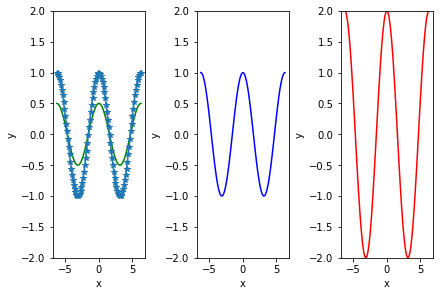

In [26]:
x = np.linspace(-2*np.pi,2*np.pi, 100)
y = np.cos(x)

fig, ax = plt.subplots(1,3, constrained_layout = True)

ax[0].plot(x,0.5*y,'g')
ax[0].plot(x,y, '-*')
ax[1].plot(x,y,'b')
ax[2].plot(x,2*y,'r')

for i in range(len(ax)):
    ax[i].set_ylim(-2,2)
    ax[i].set_ylabel('y')
    ax[i].set_xlabel('x')


plt.show()


What about a surface plot?
Lets plot the function $f(x,y) = x^2y^2$ for $(x,y)\in(-5,5)\times(-5,5)$

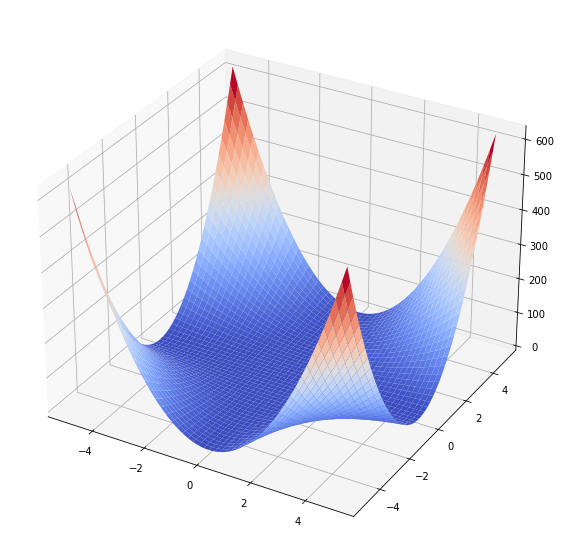

In [22]:
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,10))

#Make data
x = np.linspace(-5,5,500)
y = np.linspace(-5,5,500)

X, Y = np.meshgrid(x,y)

Z = (X**2)*(Y**2)

ax.plot_surface(X,Y,Z, cmap = cm.coolwarm)


plt.show()


## Customising plots

Consult [the documentation](https://matplotlib.org/contents.html)! Useful resources are the Examples Gallery and the Tutorials.

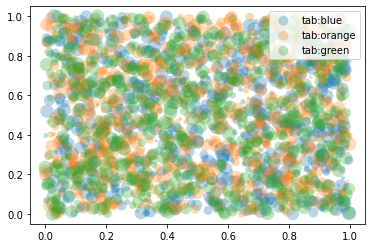

In [23]:
import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(False)

plt.show()


# Week 5 - Numerical integration

Kit Searle

## What does it mean?

**Approximate** a definite integral with a finite sum.

An integral is defined by
$$
\int_a^b f(x) \ dx =  \lim_{n\rightarrow \infty}\sum_{k=0}^nf(x_k)\Delta x
$$
where $\Delta x = \frac{b-a}{n}$ and $x_k = a + k\Delta x$. We can aproximate this function by taking a finite sum
$$
\int_a^b f(x) \ dx \approx \sum_{k=0}^N f(x_k)\Delta x.
$$

## Riemann sums and midpoint rule

Two straightforward examples: approximate the area under the curve of $f(x)$ using **rectangles**.

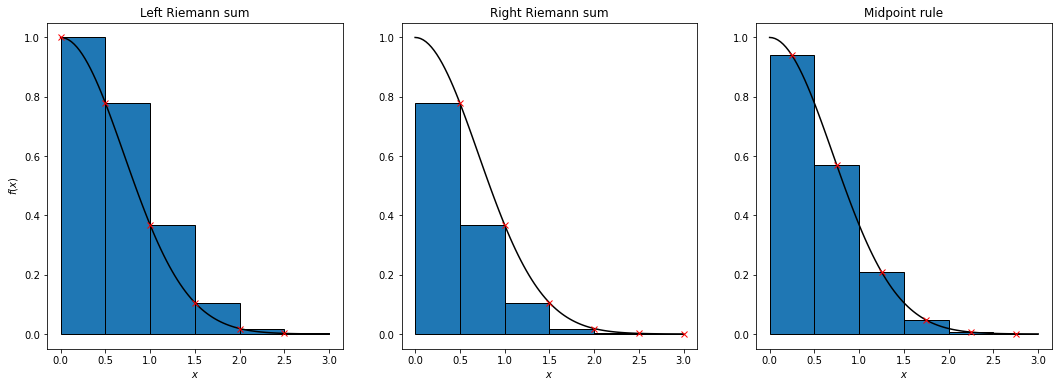

Exact: 0.8862
Left Riemann: 1.1362
Right Riemann: 0.6362
Midpoint: 0.8862


In [2]:
import int_plots

int_plots.plot_riemann_midpoint(6)


## Accuracy

We can get a more accurate result by increasing $N$.

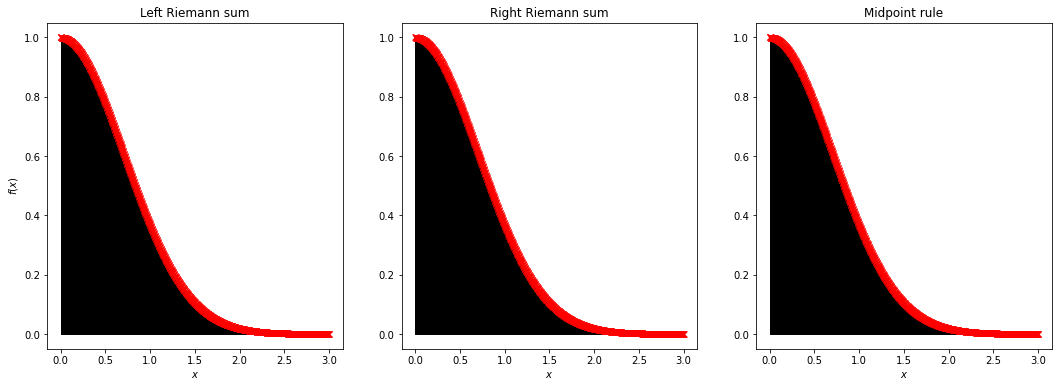

Exact: 0.8862
Left Riemann: 0.8877
Right Riemann: 0.8847
Midpoint: 0.8862


In [30]:
int_plots.plot_riemann_midpoint(1000)


Lets write a function that numeracally aproximates the integral of any continious function $f$, using the midpoint rule, over a general interval $a$ to $b$ for $a>b$ and uses $N$ rectangles

In [9]:
def f(x):                  # User can create their function here
    return np.sin(-x**2)

def riemann_midpoint(a,b,f,N):
    
    # Check that the domain makes sense
    if a > b:
        print('a should be less than b')
        
     # Check that the N makes sense   
    elif type(N) != int or N <= 0:
        print('N should be a positive interger')
        
    else:
        # Compute interval width
        dx = (b-a)/N
        
        # Create nodes and evaluate the function
        x_nodes = np.linspace(a + dx*0.5, b - dx*0.5, N)
        f_nodes = f(x_nodes)

        # Approximate integral
        approx = np.sum(dx*f_nodes)
        
        
        # Create a plot of the function f(x) to assist with visulisation
        plt.plot(x_nodes, f_nodes)

        return approx

    

In [11]:
riemann_midpoint(3,3,f,0)


N should be a positive interger


## Trapezoid rule

We can get a more accurate estimation with a smaller $N$ using **trapezoids**.

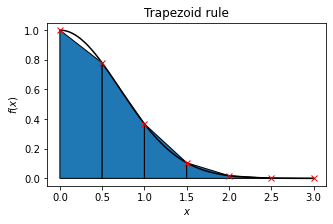

Exact: 0.88621
Trapezoid: 0.88619


In [56]:
int_plots.trapezoid(6)
